In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv', dtype='unicode')

In [90]:
data.head(10)

,crawl_timestamp,job_title,company_name,city,state,country,post_date,job_description,job_type,inferred_salary_time_unit,...,inferred_state,inferred_country,fitness_score,inferred_salary_from,inferred_salary_to,inferred_salary_currency,is_consumed_job,job_requirements,contact_email,month
0,2020-06-26 01:54:03 +0000,Asphalt/Concrete Senior Project Manager,GPAC,Houston,TX,US,2020-06-25,SR. PROJECT MANAGER WANTED!!! My client is a M...,Full-Time,/,...,Texas,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-06
1,2020-05-17 01:21:05 +0000,Amazon Warehouse Team - Full Time,Amazon Fulfillment,Cincinnati,OH,US,2020-05-16,"Shifts: Overnight, Early Morning, Day, Evening...",Full-Time,/,...,Ohio,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05
2,2020-06-27 04:53:42 +0000,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,Peabody,MA,US,2020-06-26,"Shifts: Early Morning, Day, Evening Location: ...",Full-Time,/,...,Massachusetts,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-06
3,2020-06-03 01:21:32 +0000,Assembly Electrical,Manpower,Villard,MN,US,2020-02-06,Do you pride yourself on attention to detail a...,Full-Time,/hour,...,Minnesota,United states,10,14,14,$,NaN,NaN,NaN,2020-02
4,2020-05-23 01:19:07 +0000,Graphics Designer,The North West Company - U.S.,Anchorage,AK,US,2020-05-22,In your role as Graphics Designer for Alaska C...,Full-Time,/,...,Alaska,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05
5,2020-05-25 10:04:56 +0000,"Customer Service Representative, Full or Part ...",Circle K,Urbana,IL,US,2020-05-24,may change periodically as required by busines...,Full-Time,/,...,Illinois,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05
6,2020-05-23 01:13:40 +0000,Receptionist,Genesis Healthcare Corporation,South Brunswick Township,NJ,US,2020-05-22,Genesis HealthCare is one of the nation's lead...,Per Diem,/,...,New jersey,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05
7,2020-06-25 01:48:48 +0000,U-Haul Moving Center General Manager,Talentify,Gretna,LA,US,2020-06-24,"Location: No 4 Westbank Exp, Gretna, Louisiana...",Full-Time,/,...,Louisiana,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-06
8,2020-05-18 01:07:37 +0000,Staff Accountant,Volt,Stockton,CA,US,2020-05-17,VOLT has an immediate opening for a Staff Acco...,Full-Time,/,...,California,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05
9,2020-05-29 01:16:51 +0000,Package Handler (Non-DOT)/Part Time/PM Shift/S...,FedEx,Tampa,FL,US,2020-05-28,Job Title: Package Handler (Non-DOT)/Part Time...,Part-Time,/,...,Florida,United states,10,NaN,NaN,NaN,NaN,NaN,NaN,2020-05


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29983 entries, 0 to 29982
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   crawl_timestamp               29983 non-null  object
 1   job_title                     29983 non-null  object
 2   company_name                  29983 non-null  object
 3   city                          29983 non-null  object
 4   state                         29983 non-null  object
 5   country                       29974 non-null  object
 6   post_date                     29983 non-null  object
 7   job_description               29983 non-null  object
 8   job_type                      29751 non-null  object
 9   inferred_salary_time_unit     29983 non-null  object
 10  company_description           0 non-null      object
 11  salary_offered                4127 non-null   object
 12  job_board                     29983 non-null  object
 13  geo             

In [57]:
# data.isnull().sum()

In [46]:
missing_values = ["na","N/a",np.nan]
df= pd.read_csv('data.csv',na_values=missing_values,dtype='unicode')

In [47]:
# data.isnull().sum()

In [48]:
to_drop = ['company_description','duplicate_status','contact_email']
df.drop(to_drop, inplace=True, axis=1)

In [51]:
# df.info()

In [17]:
data["job_title"].value_counts().head()

Retail Merchandiser           375
Amazon Picker/Packer          206
Amazon Warehouse Worker       197
Amazon Order Picker           195
Amazon Warehouse Associate    175
Name: job_title, dtype: int64

### Which job title was posted the most times?      
Retail Merchandiser 375

In [5]:
data["company_name"].value_counts().head()

Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: company_name, dtype: int64

### Which company posted the most amount of jobs?  
    Amazon Fulfillment 7501

In [6]:
data.groupby("company_name")["post_date"].count().sort_values(ascending = False).head()

company_name
Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: post_date, dtype: int64

### Which city offered the most jobs?

In [7]:
data.groupby("city")["post_date"].count().sort_values(ascending = False).head()

city
Boston        262
Chicago       218
Charlotte     216
Cincinnati    212
Portland      211
Name: post_date, dtype: int64

### Ans : Boston 262

### Which state offered the most jobs?

In [8]:
data.groupby("state")["post_date"].count().sort_values(ascending = False).head()

state
CA    2772
NJ    1862
MA    1688
PA    1599
TX    1593
Name: post_date, dtype: int64

### Ans : CA 2772

<AxesSubplot:>

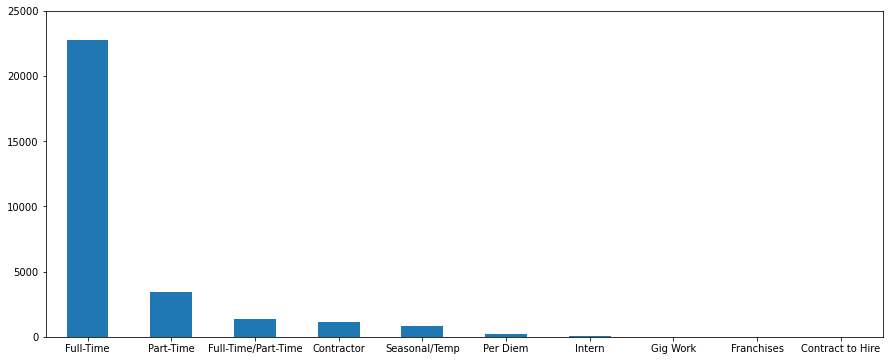

In [44]:
df = data['job_type'].value_counts()
df
df.plot(kind='bar',figsize=(15,6),rot=0, ylim=(0,25000))

In [82]:
data['month'] = pd.to_datetime(data['post_date'])

<AxesSubplot:xlabel='month'>

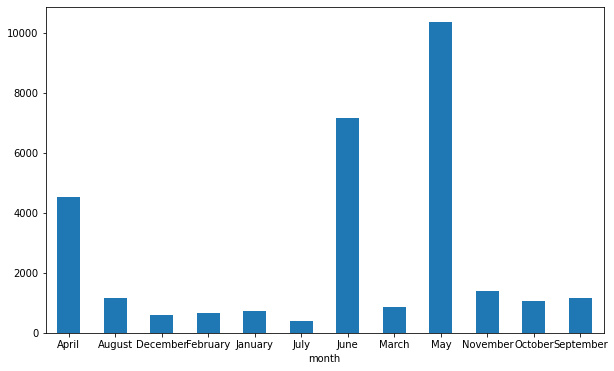

In [88]:
df= data.groupby(data['month'].dt.strftime('%B'))['post_date'].count()
df
df.plot(kind='bar',rot=0,figsize=(10,6))

<AxesSubplot:xlabel='month'>

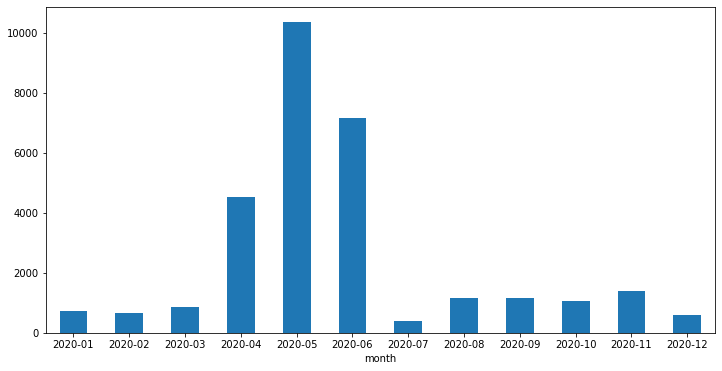

In [89]:
data['month'] = pd.to_datetime(data['post_date']).dt.to_period('M')
df= data.groupby('month')['post_date'].count()
df.plot(kind='bar',rot=0,figsize=(12,6))